# Will I die if I eat this mushroom?

# Logistic Regression Model

### DataSet Content

This dataset was obtained via kaggle. The purpose of this dataset was originally to help people in mushroom hunting or "shrooming". It is to aid people in determining which mushrooms are safe to eat and which will cause them to die.

The dataset includes 23 mushrooms from the Agaricus and Lepiota family and was drawn from the The Audubon Society Field Guide to North American Mushrooms (1981).

The dataset has identied the mushroom features with one letter variables. Below is the legend of what letter stands for which feature.

#### Mushroom Features Variables

Classes: 
edible = e, 
poisonous = p

Cap-shape: 
bell = b,
conical = c,
convex = x,
flat = f, 
knobbed = k,
sunken = s

Cap-surface: 
fibrous = f,
grooves = g,
scaly = y,
smooth = s

Cap-color: 
brown = n,
buff = b,
cinnamon = c,
gray = g,
green = r,
pink = p,
purple = u,
red = e,
white = w,
yellow = y

Bruises: 
bruises = t,
no = f

Odor: 
almond = a,
anise = l,
creosote = c,
fishy = y,
foul = f,
musty = m,
none = n,
pungent = p,
spicy = s

Gill-attachment: 
attached = a,
descending = d,
free = f
notched = n

Gill-spacing: 
close = c,
crowded = w,
distant = d

Gill-size: 
broad = b,
narrow = n

Gill-color: 
black = k,
brown = n,
buff = b,
chocolate = h,
gray = g, 
green = r,
orange = o,
pink = p,
purple = u,
red = e,
white = w,
yellow = y

Stalk-shape: 
enlarging = e,
tapering = t

Stalk-root:
bulbous = b,
club = c,
cup = u,
equal = e,
rhizomorphs = z,
rooted = r,
missing = ?

Stalk-surface-above-ring:
fibrous = f,
scaly = y,
silky = k,
smooth = s

Stalk-surface-below-ring:
fibrous = f,
scaly = y,
silky = k,
smooth = s

Stalk-color-above-ring:
brown = n,
buff = b,
cinnamon = c,
gray = g,
orange = o,
pink = p,
red = e,
white = w,
yellow = y

Stalk-color-below-ring:
brown = n,
buff = b,
cinnamon = c,
gray = g,
orange = o,
pink = p,
red = e,
white = w,
yellow = y

Veil-type:
partial = p,
universal = u

Veil-color:
brown = n,
orange = o,
white = w,
yellow = y

Ring-number:
none = n
one = o
two = t

Ring-type:
cobwebby = c,
evanescent = e,
flaring = f,
large = l,
none = n,
pendant = p,
sheathing = s,
zone = z

Spore-print-color:
black = k,
brown = n,
buff = b,
chocolate = h,
green = r,
orange = o,
purple = u,
white = w,
yellow = y

Population:
abundant = a,
clustered = c,
numerous = n,
scattered = s,
several = v,
solitary = y

Habitat:
grasses = g,
leaves = l,
meadows = m,
paths = p,
urban = u,
waste = w,
woods = d

### Step 1: Import Libraries and Data

In [1]:
# Import Libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# Import and read the csv
data_df = pd.read_csv('mushrooms.csv')
data_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data_df['class'].unique()

array(['p', 'e'], dtype=object)

### Step 2: Encode the Data

By using LabelEncoder, the variable "p" for poisonous in the Class column will become "1". Also "x_dummies" will convert all remaining letter variables into either a "1" or a "0". 

In [4]:
# Separate the Y variable (Labels)
y = data_df['class']

# Separate the X variables (Features)
x = data_df.drop(columns="class")

In [5]:
from sklearn.preprocessing import LabelEncoder
label_model = LabelEncoder()
y_encoded = label_model.fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
# View y Variable Series
y_encoded[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [7]:
# View x Variable
x[:10]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


In [8]:
# Creating dummy variables for x features
x_dummies = pd.get_dummies(x,dtype=float)
x_dummies

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

### Step 3: Split the data

In [10]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y_encoded, random_state=78)

### Step 4: Perform Logistic Regression

In [11]:
# Initializing the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [12]:
# Train the data
log_reg_model = log_reg.fit(x_train, y_train)

### Step 5: Make Prediction

In [13]:
# Perform prediction using the test dataset
y_pred = log_reg_model.predict(x_test)

### Step 6: Display the Confusion Matrix and Calculating the Accuracy Score of the Model

In [14]:
# Show the Confusion Matrix
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred)}")

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Classification Report
print("Classification Report", classification_report(y_test, y_pred))

Confusion Matrix : [[1048    0]
 [   0  983]]
Accuracy: 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Step 7: Visualization

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


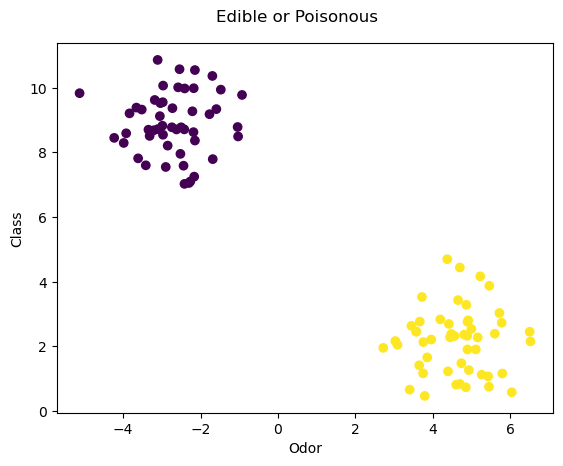

In [16]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel("Odor")
plt.ylabel("Class")

plt.suptitle("Edible or Poisonous").set_y(0.95)

## Optimization of Model

### Optimization Step 1: Import and Read the Data

In [17]:
# Import and read the csv
opt = pd.read_csv('mushrooms.csv')
opt

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Optimization Step 2: Encode the Data

The model optimization and evaluation process is showing iterative changes made to the model and the resulting changes in model performance is documented the Python script in line 33.

In [18]:
# Separate the Y variable (Labels)
y = opt['class']

In [19]:
# Separate the X variable, the features & dropping columns
x_opt = opt.drop(columns=["class","gill-spacing","gill-size",'ring-number','stalk-surface-above-ring','bruises',
                    'stalk-surface-below-ring','gill-attachment','veil-type','ring-type','population','habitat','stalk-root','spore-print-color'])
x_opt

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,veil-color
0,x,s,n,p,k,e,w,w,w
1,x,s,y,a,k,e,w,w,w
2,b,s,w,l,n,e,w,w,w
3,x,y,w,p,n,e,w,w,w
4,x,s,g,n,k,t,w,w,w
...,...,...,...,...,...,...,...,...,...
8119,k,s,n,n,y,e,o,o,o
8120,x,s,n,n,y,e,o,o,n
8121,f,s,n,n,n,e,o,o,o
8122,k,y,n,y,b,t,w,w,w


In [20]:
from sklearn.preprocessing import LabelEncoder
label_model = LabelEncoder()
y_encoded_opt = label_model.fit_transform(y)
y_encoded_opt

array([1, 0, 0, ..., 0, 1, 0])

In [21]:
# View y Variable Series
y_encoded_opt[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [22]:
# View x Variable
x_opt

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,veil-color
0,x,s,n,p,k,e,w,w,w
1,x,s,y,a,k,e,w,w,w
2,b,s,w,l,n,e,w,w,w
3,x,y,w,p,n,e,w,w,w
4,x,s,g,n,k,t,w,w,w
...,...,...,...,...,...,...,...,...,...
8119,k,s,n,n,y,e,o,o,o
8120,x,s,n,n,y,e,o,o,n
8121,f,s,n,n,n,e,o,o,o
8122,k,y,n,y,b,t,w,w,w


In [23]:
# Creating dummy variables for x features
x_dummies_opt = pd.get_dummies(x,dtype=float)
x_dummies_opt

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Optimization Step 3: Spliting the Data

In [24]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_dummies_opt, y_encoded_opt, random_state=78)

### Optimization Step 4: Perform Logistic Regression

In [25]:
# Initializing the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_opt = LogisticRegression()
log_reg_opt

LogisticRegression()

In [26]:
# Train the data
log_reg_opt_model = log_reg_opt.fit(x_train, y_train)

### Optimization Step 5: Make Prediction

In [27]:
# Perform prediction using the test dataset
y_pred_opt = log_reg_opt_model.predict(x_test)

### Optimization Step 6: Display the Confusion Matrix and Calculating the Accuracy Score of the Model

In [28]:
# Show the Confusion Matrix
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_opt)}")

# Calculating the accuracy of the model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print("Accuracy:", accuracy_opt)

#Classification Report
print("Classification Report", classification_report(y_test, y_pred_opt))

Confusion Matrix : [[1048    0]
 [   0  983]]
Accuracy: 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

